In [129]:
import pandas as pd
import yfinance as yf
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
# from pandas_datareader import data as pdr
# Can be used for collecting other data. 

In [130]:
# Variables
EndPoint = dt.datetime(2023, 4, 16, 12, 18, 33) 
YearsToFetch = 20
StartPoint = 365 * YearsToFetch

In [131]:
tickers = ["QQQ", "SPY", "OSEBX.OL", "GLD"]
# tickers = ["SPY"]

In [132]:
EndDate = EndPoint
StartDate = EndDate - dt.timedelta(days=StartPoint)
EndDate, StartDate


(datetime.datetime(2023, 4, 16, 12, 18, 33),
 datetime.datetime(2003, 4, 21, 12, 18, 33))

In [133]:
df = yf.download(tickers, StartDate, EndDate, auto_adjust=False)
# auto_ajust to include ajd close.


[*********************100%***********************]  4 of 4 completed


In [134]:
# df.head()
# df.xs(("TSLA"), axis=1, level=1).head()

In [135]:
AdjClosePrice = df["Adj Close"]
# df.head()

In [136]:
log_returns = np.log(AdjClosePrice / AdjClosePrice.shift(1))
# print(log_returns.xs(("TSLA"),axis=1))


In [ ]:
cum_log_returns = log_returns.cumsum() + 1
cum_log_returns.tail()

Ticker,GLD,OSEBX.OL,QQQ,SPY
Date,,,,
2023-04-10,1.566728,NaN,2.585732,1.943750
2023-04-11,1.573029,NaN,2.579293,1.944019
2023-04-12,1.577902,0.852649,2.570421,1.939935
2023-04-13,1.591327,0.853068,2.589813,1.953130
2023-04-14,1.573458,0.859976,2.587932,1.950684


<Axes: title={'center': 'Cumulative Ajd Close Returns'}, xlabel='Date'>

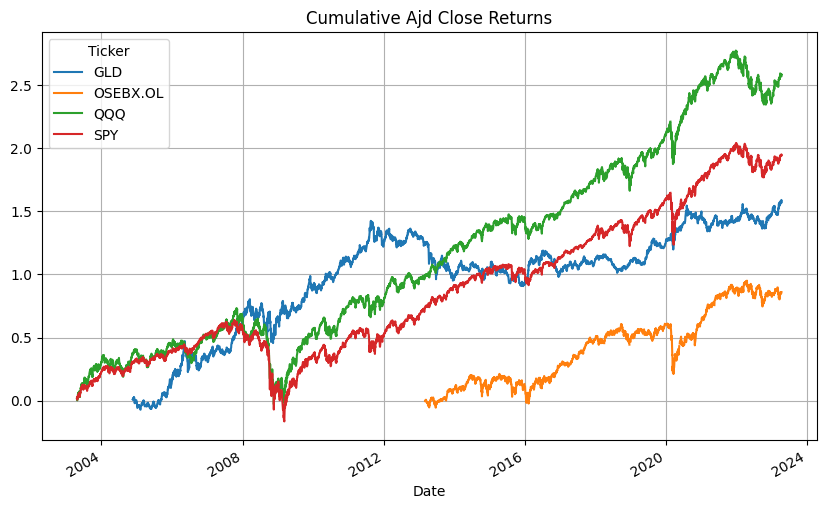

In [138]:
cum_log_returns.plot(figsize=(10,6), title="Cumulative Ajd Close Returns", grid=True)